In [26]:
# import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import Dense
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
input_data = pd.read_csv(r"D:\OneDrive\Documents\Airbus\fullstack\DjangoAPI\bankloan.txt", index_col=False)
df = input_data.dropna()
df.isna().any()
df = df.drop('Loan_ID', axis = 1)
print(Counter(df['Loan_Status']))
print(df.shape)
print(df.columns)
print(df.head())

Counter({'Y': 332, 'N': 148})
(480, 12)
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
  Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
1   Male     Yes         1.0      Graduate            No             4583   
2   Male     Yes         0.0      Graduate           Yes             3000   
3   Male     Yes         0.0  Not Graduate            No             2583   
4   Male      No         0.0      Graduate            No             6000   
5   Male     Yes         2.0      Graduate           Yes             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0    

In [3]:
pre_y = df["Loan_Status"]
# print(pre_y.head())
pre_x = df.drop('Loan_Status', axis = 1)
# print(pre_x.head())
dm_X = pd.get_dummies(pre_x)
dm_y = pre_y.map({'Y':1, "N":0})
print(dm_y.head())
(dm_X.head())

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1


In [5]:
smote = SMOTE(ratio='minority')
X1, y = smote.fit_sample(dm_X, dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

C:\Users\Saurabh Bajaj\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [8]:
print(Counter(y))

Counter({0: 332, 1: 332})


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [17]:
classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=20, epochs=50, verbose=1)
eval_model=classifier.evaluate(X_train, y_train)
eval_model



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





531/531 [==============================] - 4s 8ms/step - loss: 0.6905 - acc: 0.4896
Epoch 2/50
531/531 [==============================] - 0s 555us/step - loss: 0.6708 - acc: 0.5706
Epoch 3/50
531/531 [==============================] - 0s 563us/step - loss: 0.6450 - acc: 0.6798 0s - loss: 0.6530 - acc: 0.
Epoch 4/50
531/531 [==============================] - 0s 565us/step - loss: 0.6289 - acc: 0.7439
Epoch 5/50
531/531 [==============================] - 0s 574us/step - loss: 0.6159 - acc: 0.7608
Epoch 6/50
531/531 [==============================] - 0s 519us/step - loss: 0.6049 - acc: 0.7552
Epoch 7/50
531/531 [==============================] - 0s 608us/step - loss: 0.5940 - acc: 0.7684
Epoch 8/50
531/531 [==============================] - 0s 595us/step - loss: 0.5890 - acc: 0.7608
Epoch 9/50
531/531 [==============================] - 0s 595us/step - loss: 0.5887 - acc: 0.76

[0.2963347033143268, 0.8870056491562651]

In [18]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

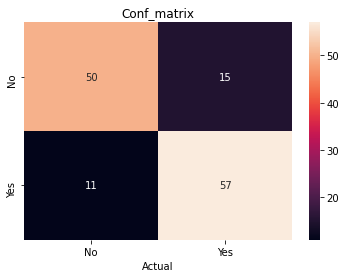

In [27]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax =ax)
ax.set_xlabel('Predict'); ax.set_xlabel('Actual');
ax.set_title('Conf_matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']); 